In [52]:
library('RODBC')
library('quantmod')
library('PerformanceAnalytics')
library('VennDiagram')
source("/usr/common/config.R")
lcon <- odbcDriverConnect(sprintf("Driver={SQL Server};Server=%s;Database=%s;Uid=%s;Pwd=%s;", ldbserver, ldbname, ldbuser, ldbpassword), case = "nochange", believeNRows = TRUE)


In [53]:
mfCodes<-c(118989, 101592) #HDFC Mid Cap Opportunities, Birla Sun Life Midcap
#indices<-c('NIFTY 100', 'NIFTY MID100 FREE', 'NIFTY SML100 FREE') #large-cap, mid-cap, small-cap
#indices<-c('NIFTY MID100 FREE', 'NIFTY SML100 FREE') #mid-cap, small-cap
indices<-c('NIFTY 100', 'NIFTY MID100 FREE') #large-cap, #mid-cap

iConstList<-vector('list', length(indices)+length(mfCodes))
for(i in 1:length(indices)){
    constis<-sqlQuery(lcon, sprintf("select symbol from INDEX_NSE_3 where index_name='%s'", indices[i]))[,1]
    iConstList[[i]]<-constis
}


In [54]:
for(i in 1:length(mfCodes)){
    mfCode<-mfCodes[i]
    portfolioDate<-as.Date(sqlQuery(lcon, sprintf("select max(PORTFOLIO_DATE) from MF_PORTFOLIO_HISTORY
                                                    where scheme_code=%d", mfCode))[[1]])

    iConstList[[length(indices)+i]]<-sqlQuery(lcon, sprintf("select symbol from MF_PORTFOLIO_HISTORY
                                                                where INSTRUMENT ='equity'
                                                                and SCHEME_CODE=%d
                                                                and PORTFOLIO_DATE='%s'
                                                                and INSTRUMENT_TYPE = ''", mfCode, portfolioDate))[,1]
    
    print(sprintf("%d: %d", mfCode, length(iConstList[[length(indices)+i]])))
}
names(iConstList)<-c(indices, mfCodes)


[1] "118989: 75"
[1] "101592: 66"


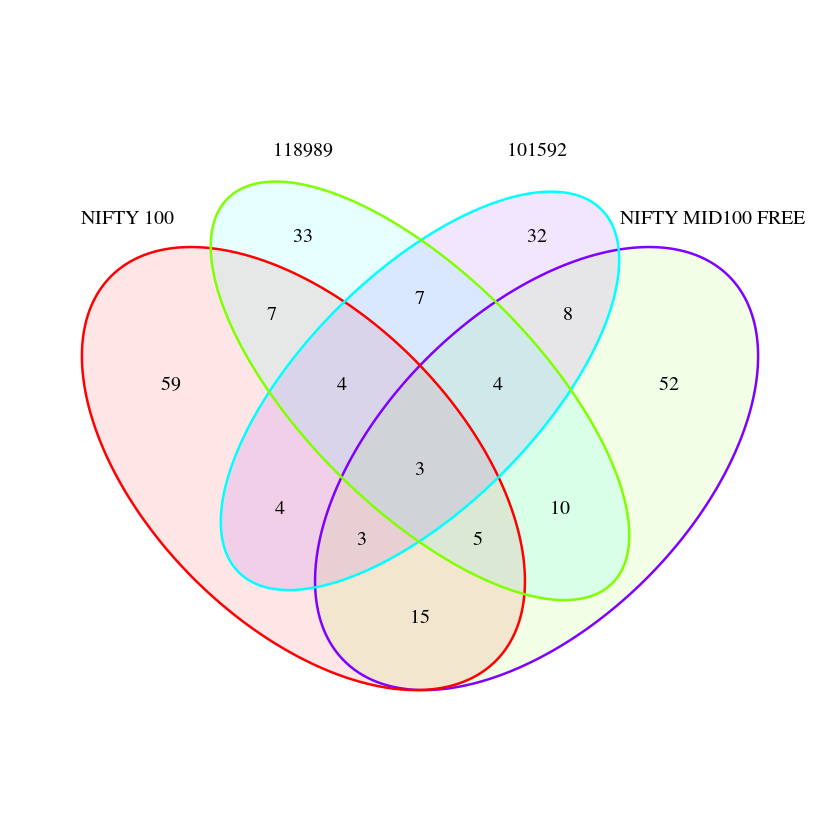

In [55]:
vColors=rainbow(length(indices)+length(mfCodes))
vplot<-venn.diagram(iConstList, filename=NULL, col=vColors, fill=vColors, alpha=0.1, margin=0.1)
grid.draw(vplot)